In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import itertools

DATA_PATH = 'transcriptomic_preproc'
RANDOM_STATE = 42

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
adata = sc.read(DATA_PATH) # data already preprocess
adata

AnnData object with n_obs × n_vars = 247976 × 2789
    obs: 'dataset', 'disease', 'cell_type', 'sample', 'patient_id', 'time', 'cell_types_labels', 'patient', 'MS/HC', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [9]:
adata.obs['cell_types_labels'].value_counts()

cell_types_labels
T cells                       190830
B cells                        32819
ILC                            15129
Monocytes                       6648
Plasma cells                    2000
DC                               269
HSC/MPP                          121
pDC                               59
Megakaryocytes/platelets          44
Megakaryocyte precursor           21
ETP                               12
Macrophages                       10
Double-positive thymocytes         5
Cycling cells                      3
Mast cells                         2
Double-negative thymocytes         1
Epithelial cells                   1
B-cell lineage                     1
MNP                                1
Name: count, dtype: int64

In [10]:
# drop cells 'Double-negative thymocytes', 'Epithelial cells', 'B-cell lineage', 'MNP'
adata = adata[~adata.obs['cell_types_labels'].isin(['Double-negative thymocytes', 'Epithelial cells', 'B-cell lineage', 'MNP'])]

### Finding markers gene

In [11]:
sc.tl.rank_genes_groups(adata, 'cell_types_labels', method='t-test', random_state=RANDOM_STATE)

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:640: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\giuli\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
c:\Users\giuli\anaconda3\lib\site-packa

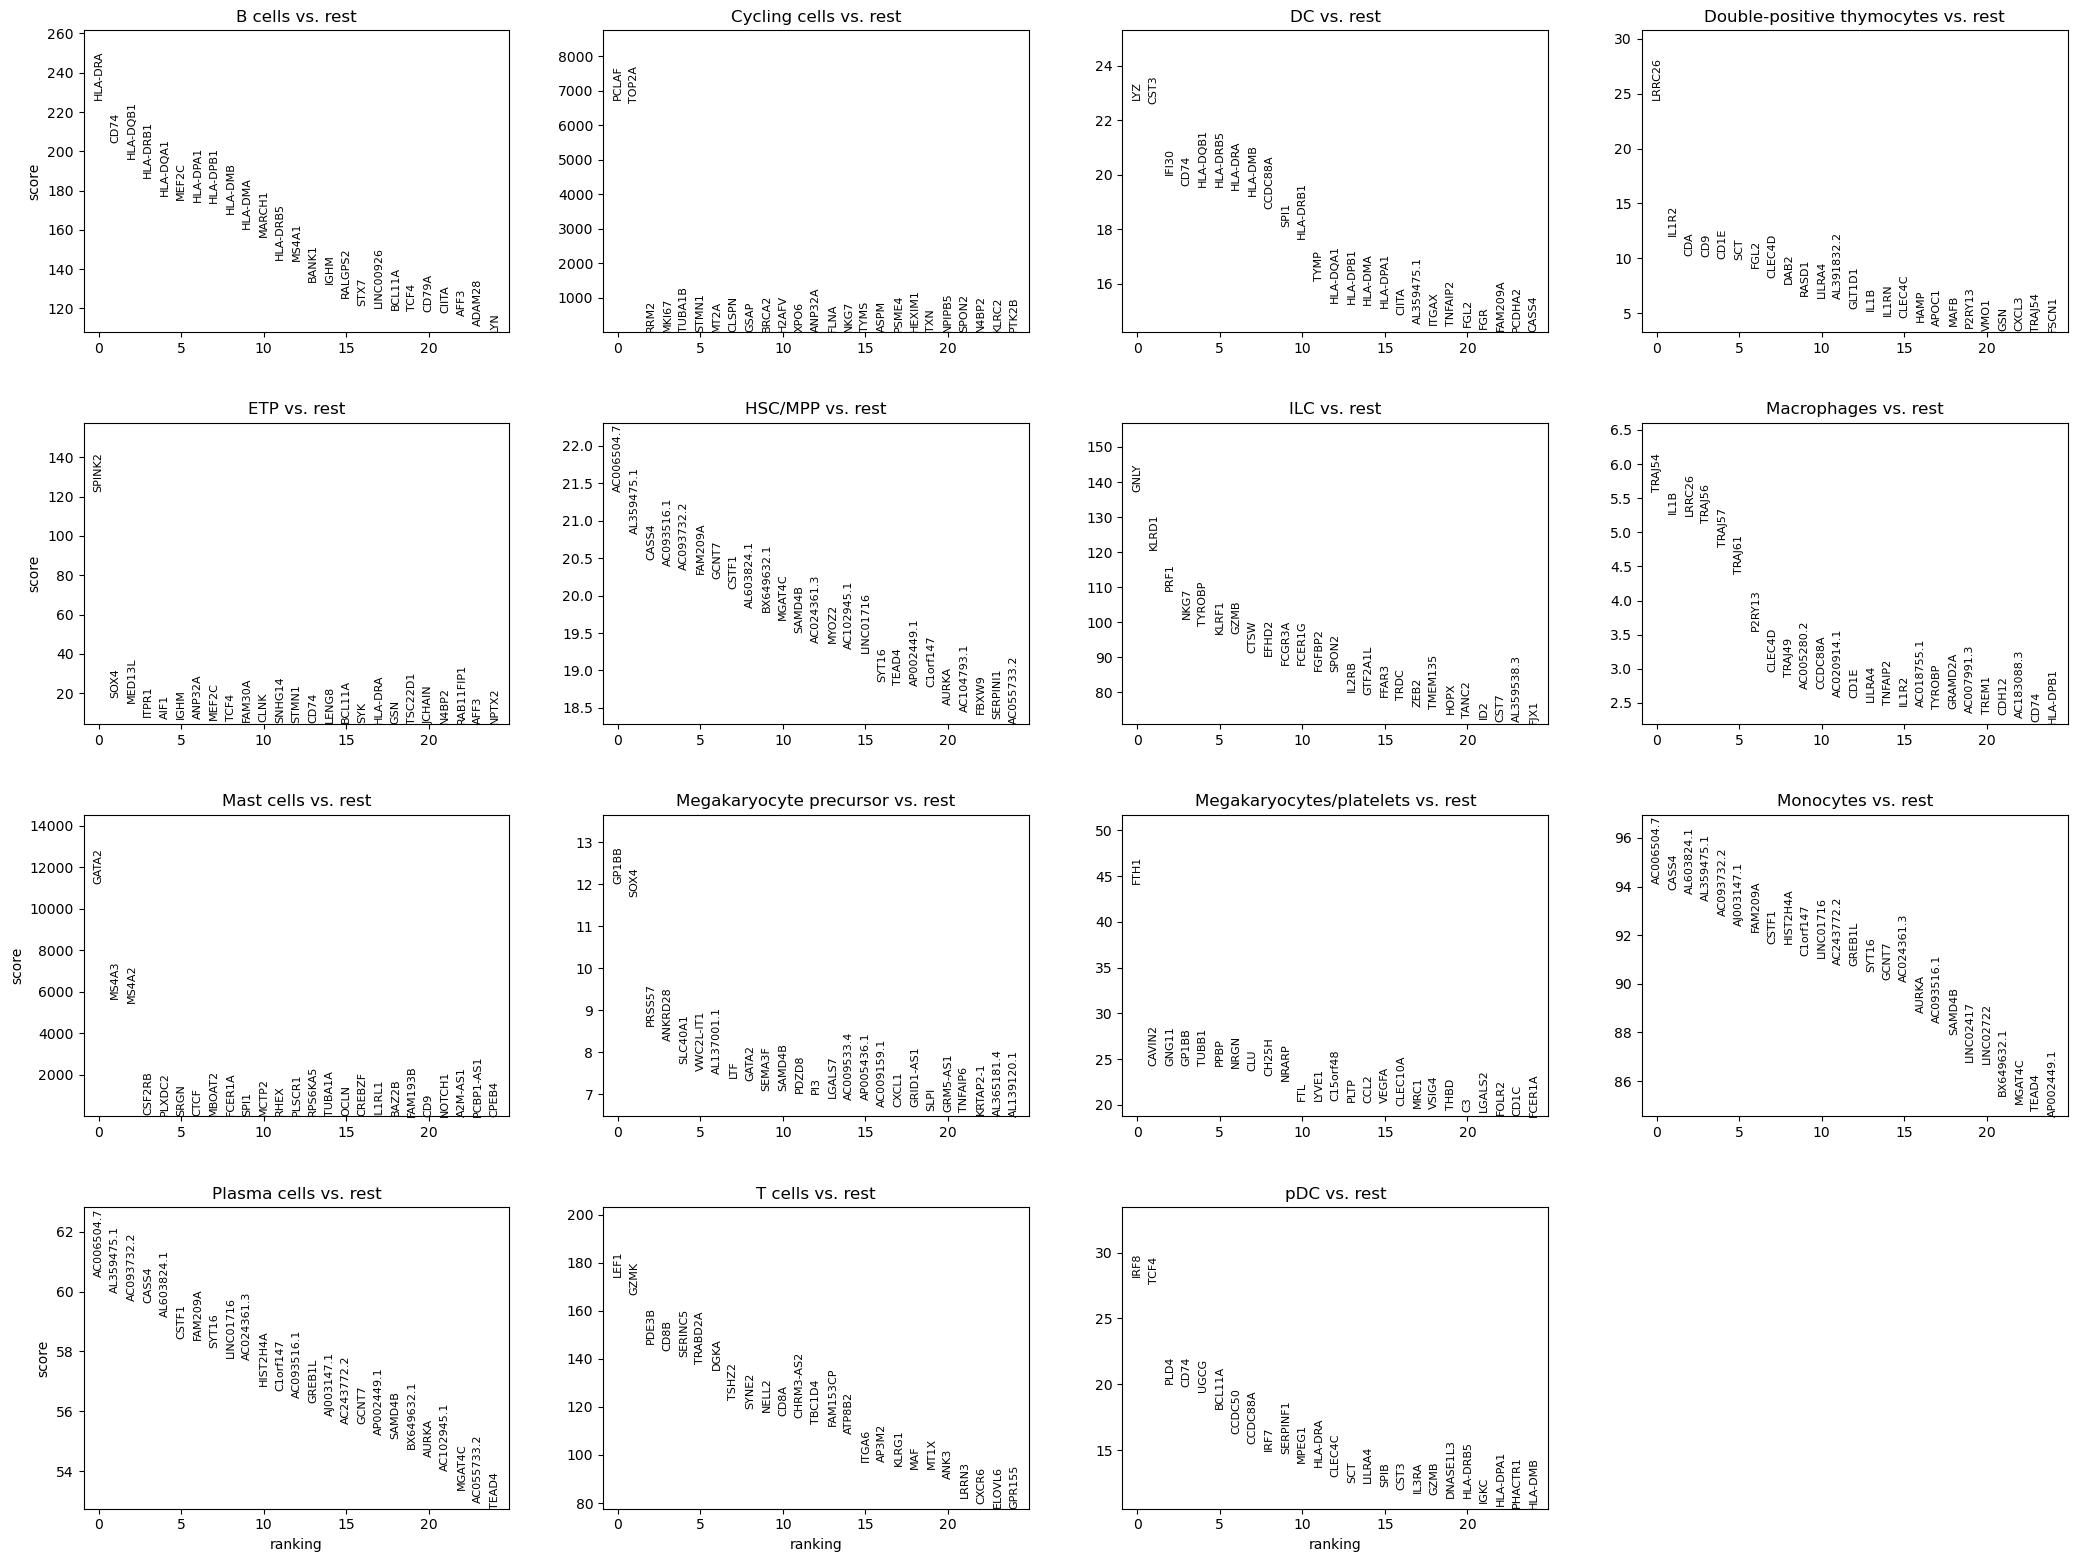

In [12]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [13]:
pd.DataFrame(adata.uns['rank_genes_groups']['names'])[:10]

B cells Cycling cells        DC Double-positive thymocytes     ETP  \
0   HLA-DRA         PCLAF       LYZ                     LRRC26  SPINK2   
1      CD74         TOP2A      CST3                      IL1R2    SOX4   
2  HLA-DQB1          RRM2     IFI30                        CDA  MED13L   
3  HLA-DRB1         MKI67      CD74                        CD9   ITPR1   
4  HLA-DQA1        TUBA1B  HLA-DQB1                       CD1E    AIF1   
5     MEF2C         STMN1  HLA-DRB5                        SCT    IGHM   
6  HLA-DPA1          MT2A   HLA-DRA                       FGL2  ANP32A   
7  HLA-DPB1         CLSPN   HLA-DMB                     CLEC4D   MEF2C   
8   HLA-DMB          GSAP   CCDC88A                       DAB2    TCF4   
9   HLA-DMA         BRCA2      SPI1                      RASD1  FAM30A   

      HSC/MPP     ILC Macrophages Mast cells Megakaryocyte precursor  \
0  AC006504.7    GNLY      TRAJ54      GATA2                   GP1BB   
1  AL359475.1   KLRD1        IL1B      MS4A3                    SOX4   
2       CASS4    PRF1      LRRC26      MS4A2                  PRSS57   
3  AC093516.1    NKG7      TRAJ56     CSF2RB                 ANKRD28   
4  AC093732.2  TYROBP      TRAJ57     PLXDC2                 SLC40A1   
5     FAM209A   KLRF1      TRAJ61       SRGN               VWC2L-IT1   
6       GCNT7    GZMB      P2RY13       CTCF              AL137001.1   
7       CSTF1    CTSW      CLEC4D     MBOAT2                     LTF   
8  AL603824.1   EFHD2      TRAJ49     FCER1A                   GATA2   
9  BX649632.1  FCGR3A  AC005280.2       SPI1                  SEMA3F   

  Megakaryocytes/platelets   Monocytes Plasma cells  T cells       pDC  
0                     FTH1  AC006504.7   AC006504.7     LEF1      IRF8  
1                   CAVIN2       CASS4   AL359475.1     GZMK      TCF4  
2                    GNG11  AL603824.1   AC093732.2    PDE3B      PLD4  
3                    GP1BB  AL359475.1        CASS4     CD8B      CD74  
4                    TUBB1  AC093732.2   AL603824.1  SERINC5      UGCG  
5                     PPBP  AJ003147.1        CSTF1  TRABD2A    BCL11A  
6                     NRGN     FAM209A      FAM209A     DGKA    CCDC50  
7                      CLU       CSTF1        SYT16    TSHZ2   CCDC88A  
8                    CH25H    HIST2H4A    LINC01716    SYNE2      IRF7  
9                    NRARP    C1orf147   AC024361.3    NELL2  SERPINF1

In [14]:
# dict with cluster number as key and the genes as values
cluster_genes = {}
for cluster in pd.DataFrame(adata.uns['rank_genes_groups']['names']).columns:
    cluster_genes[cluster] = pd.DataFrame(adata.uns['rank_genes_groups']['names'])[cluster].tolist()[:10]

In [15]:
with open('results/transcriptomic_markers_per_cell_types.json', 'w') as f:
    json.dump(cluster_genes, f)

In [16]:
#adata.write('write/transcriptomic_dea_cell_types.h5ad')

### Plots

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


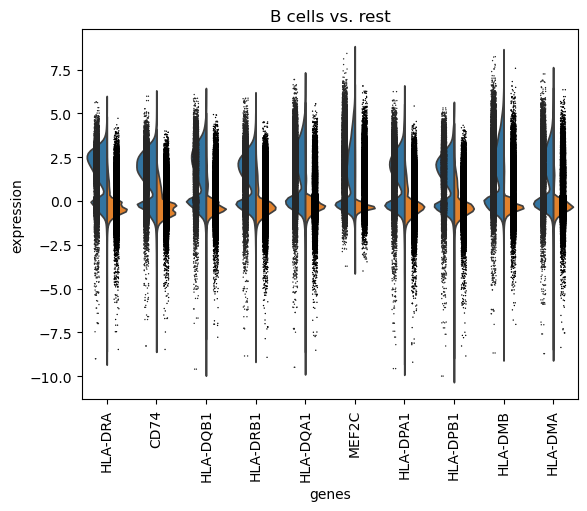

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


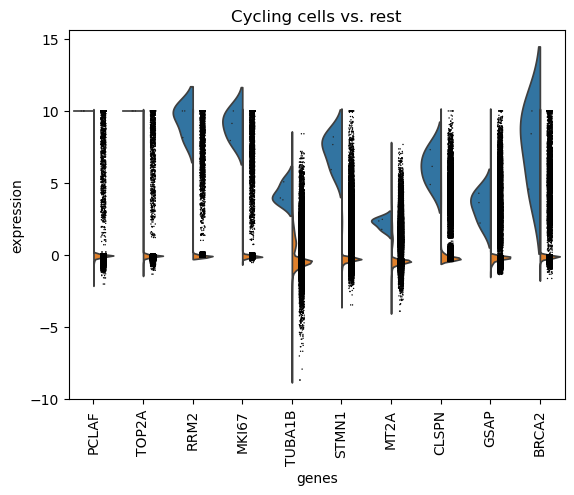

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


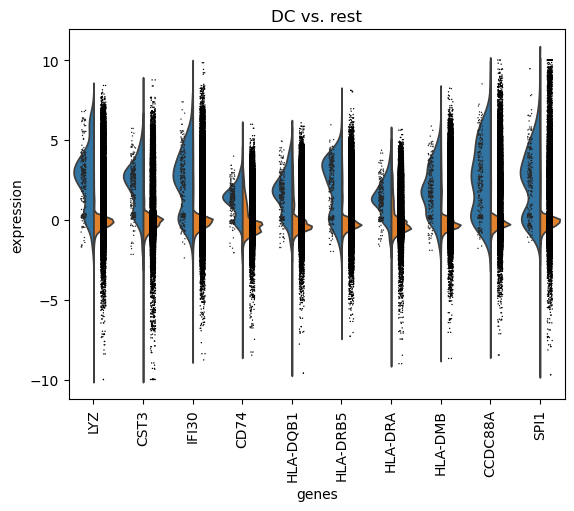

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


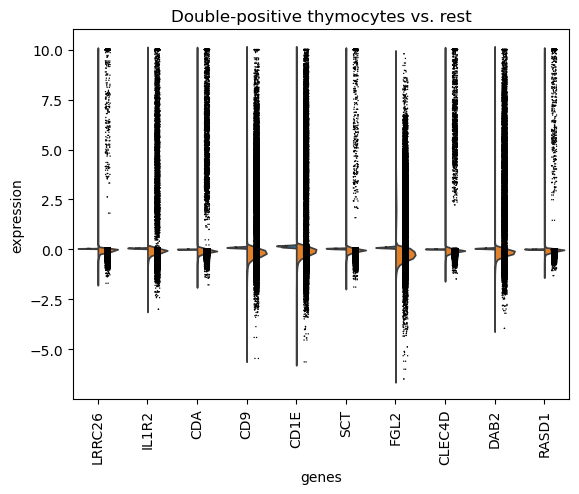

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


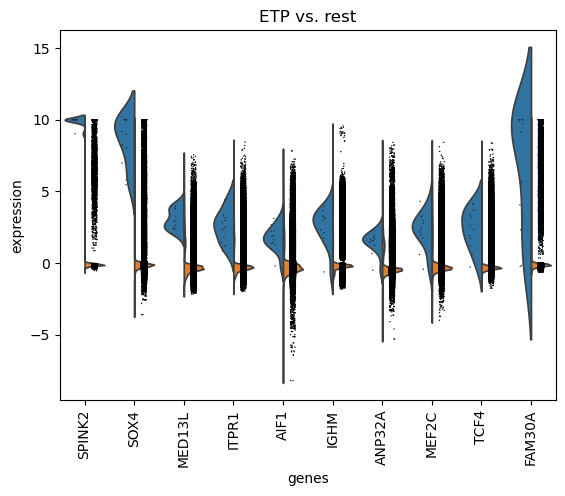

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


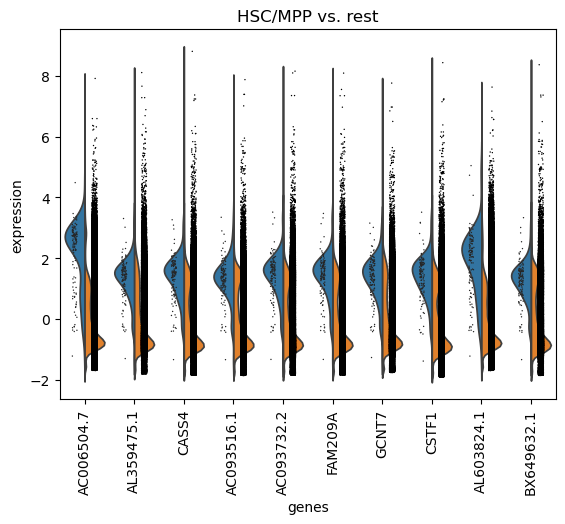

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


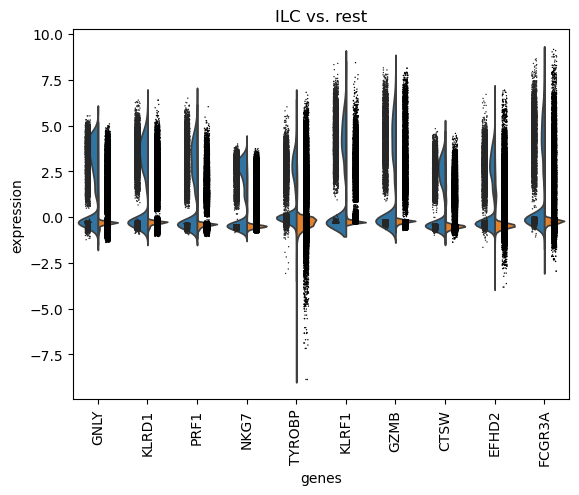

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


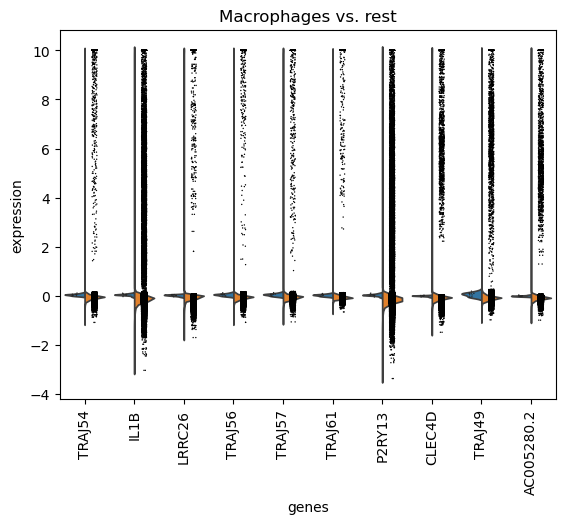

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


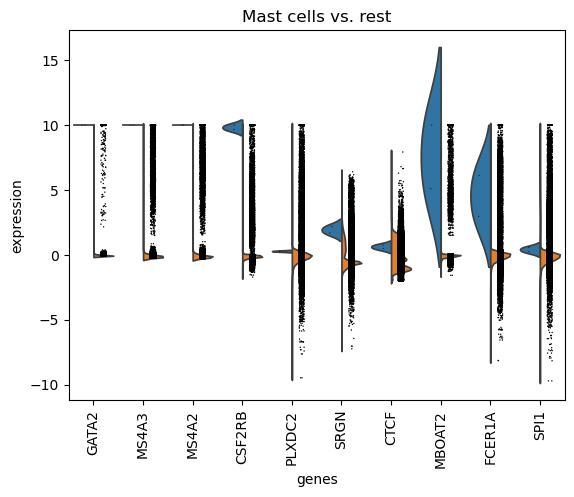

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


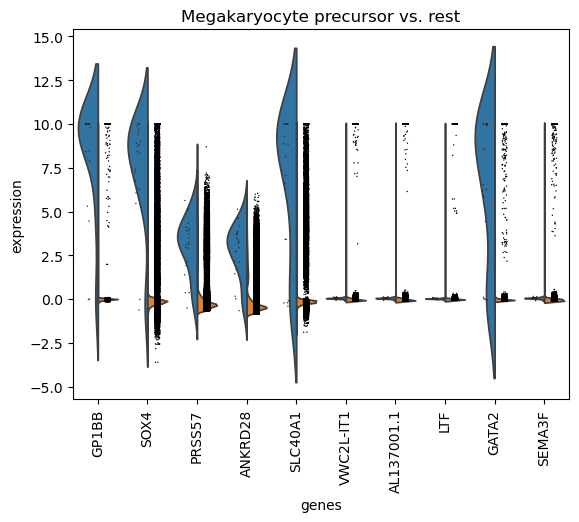

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


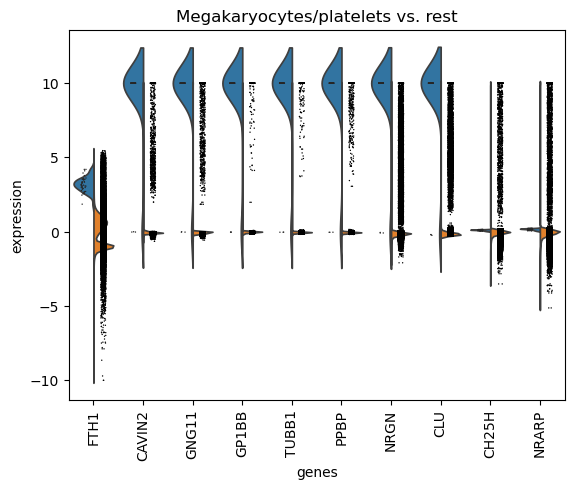

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


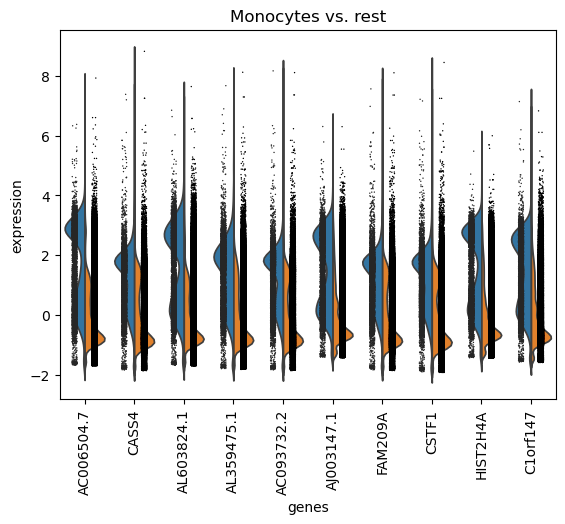

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


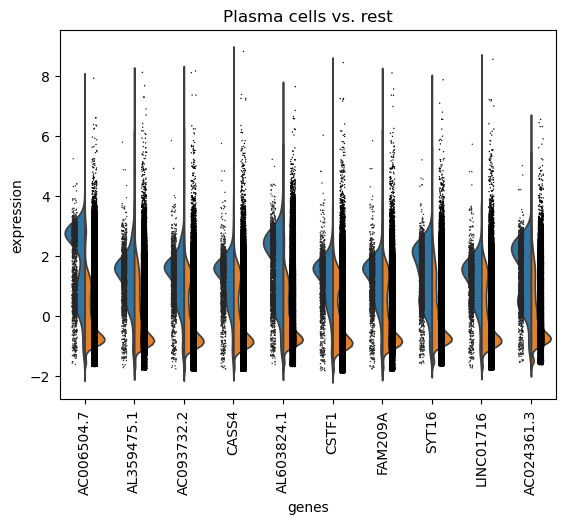

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


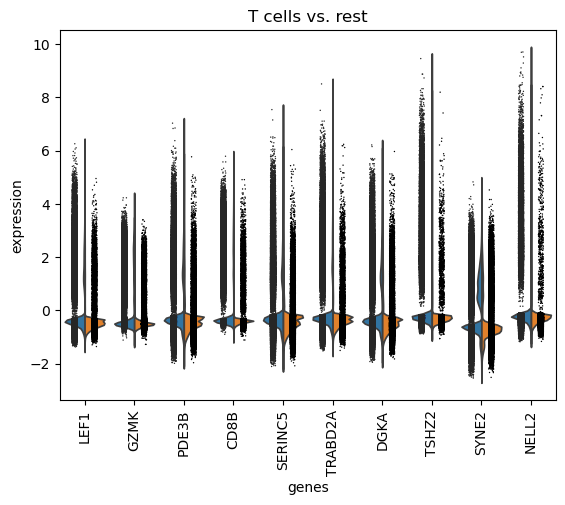

c:\Users\giuli\anaconda3\lib\site-packages\scanpy\plotting\_tools\__init__.py:1303: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


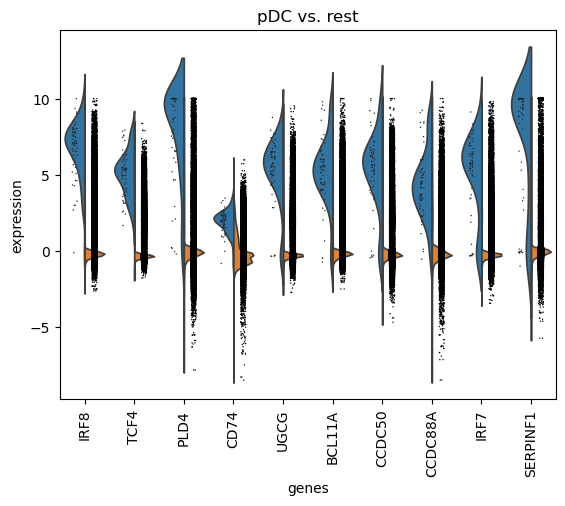

In [19]:
# visualize the clusters genes
sc.pl.rank_genes_groups_violin(adata, n_genes=10)

In [20]:
most_freq_cell_types = ['T cells', 'B cells', 'ILC', 'Monocytes', 'Plasma cells']

In [30]:
marker_genes = list(itertools.chain.from_iterable([cluster_genes[cell] for cell in most_freq_cell_types]))

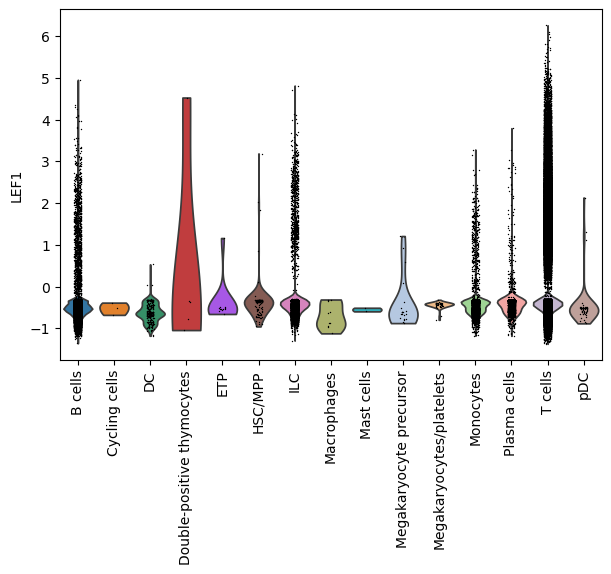

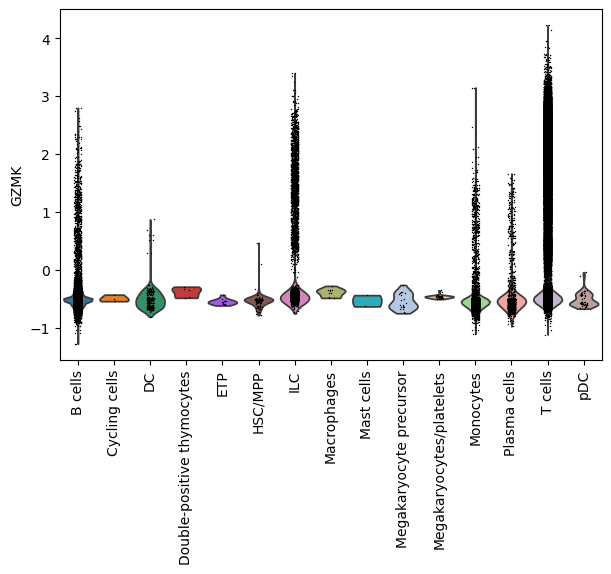

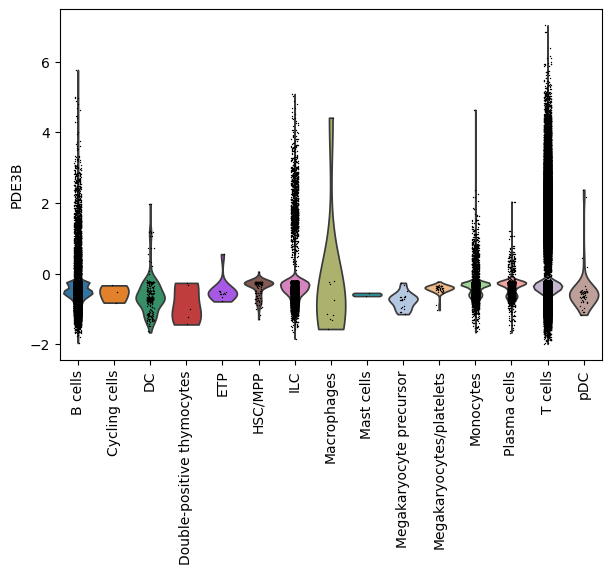

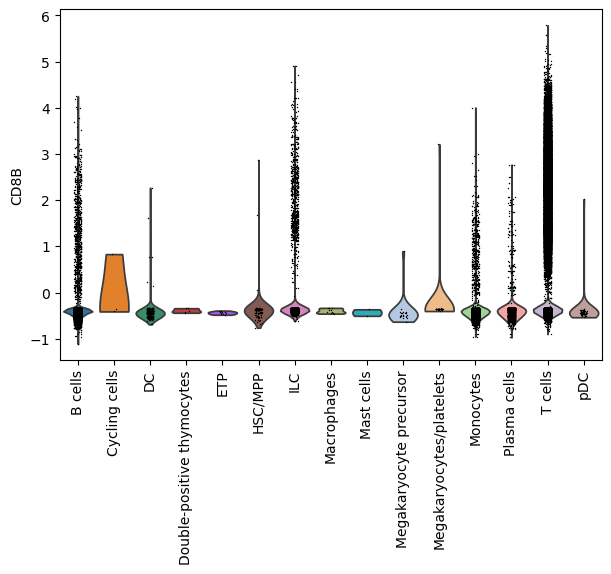

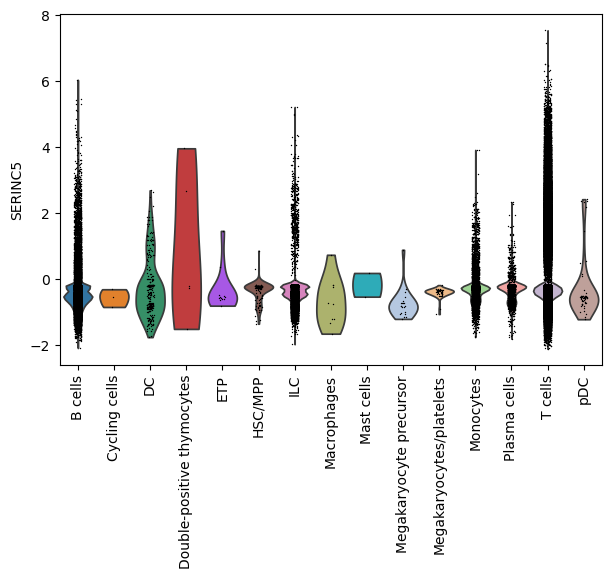

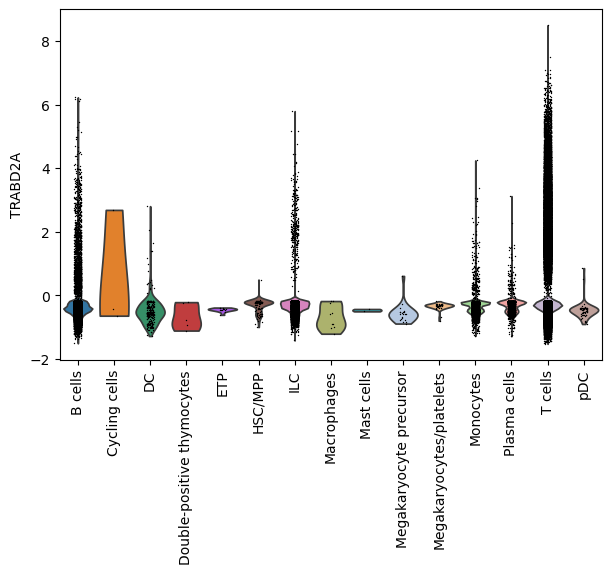

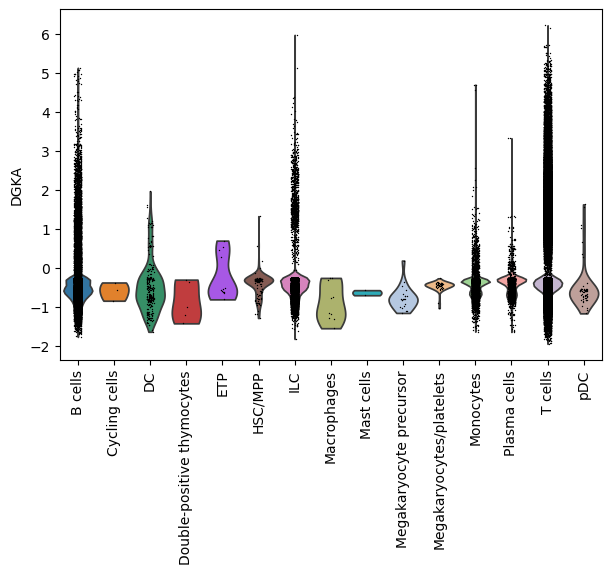

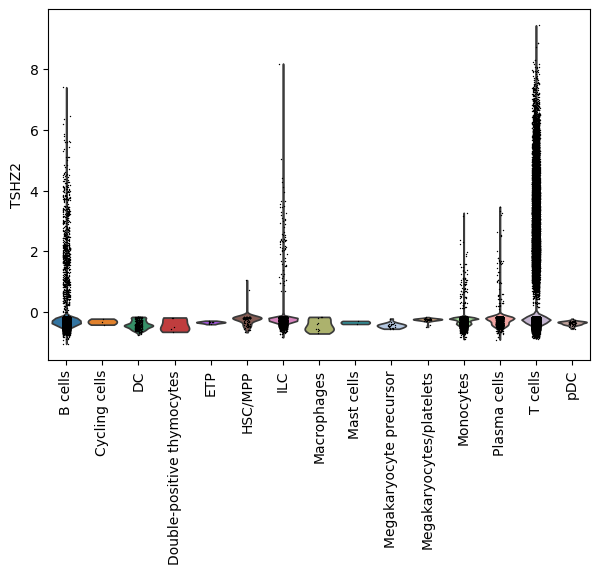

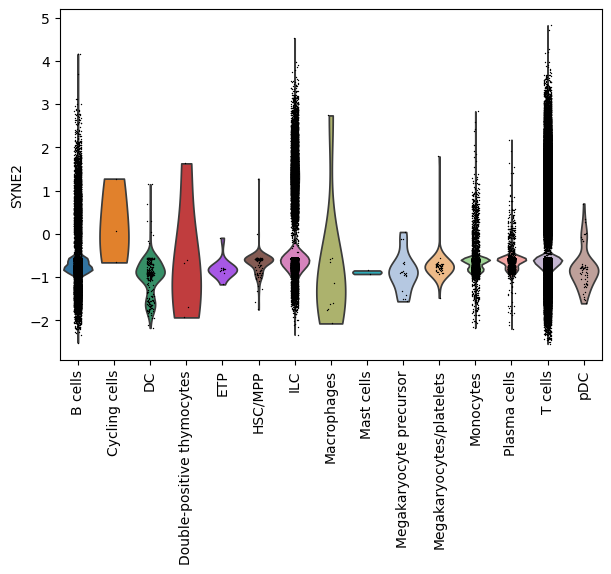

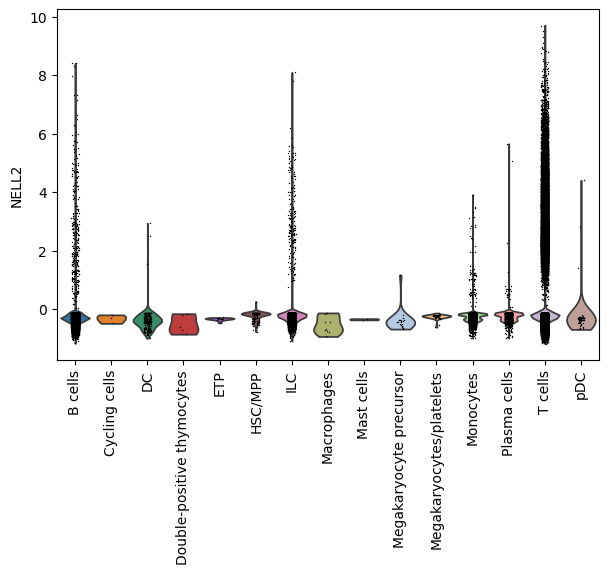

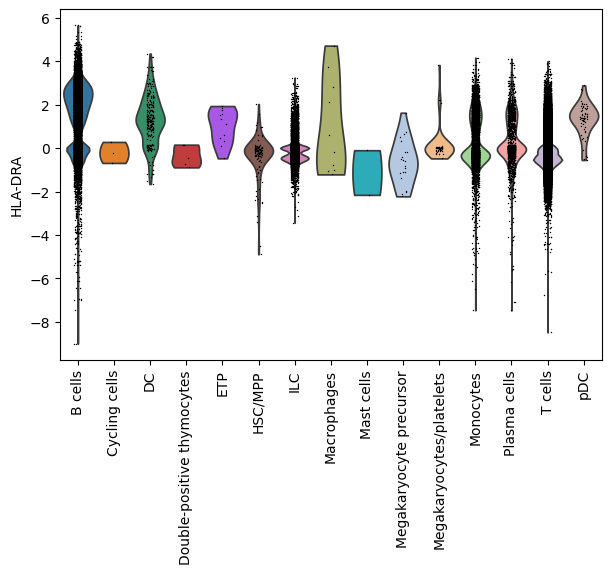

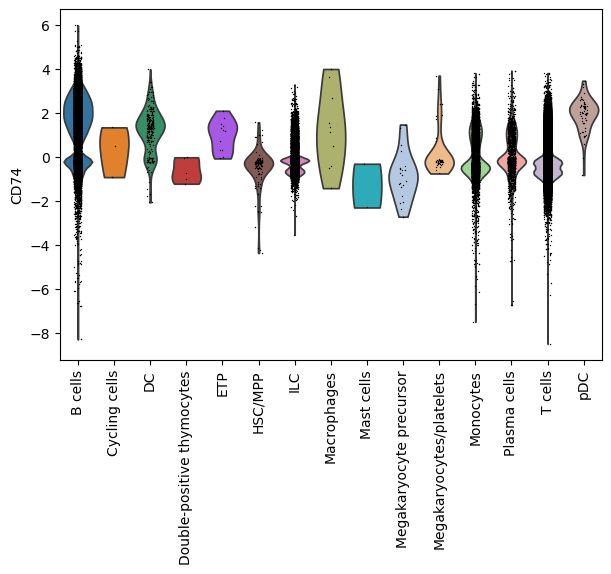

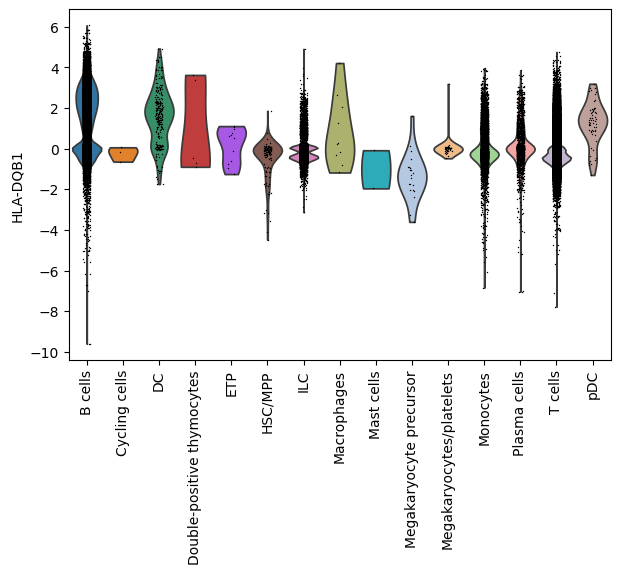

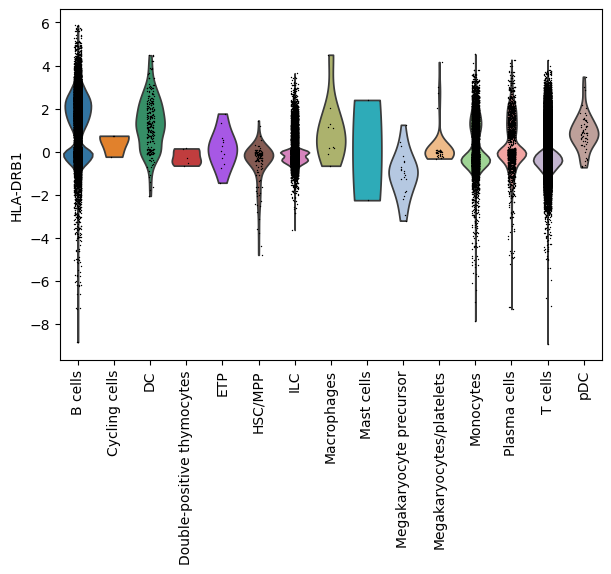

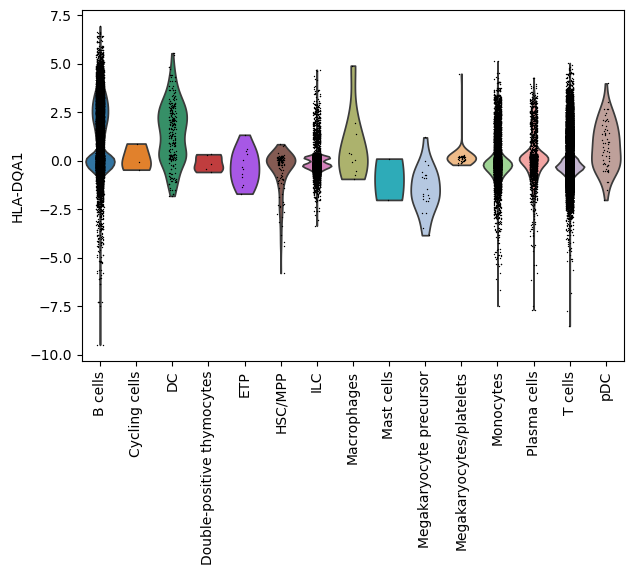

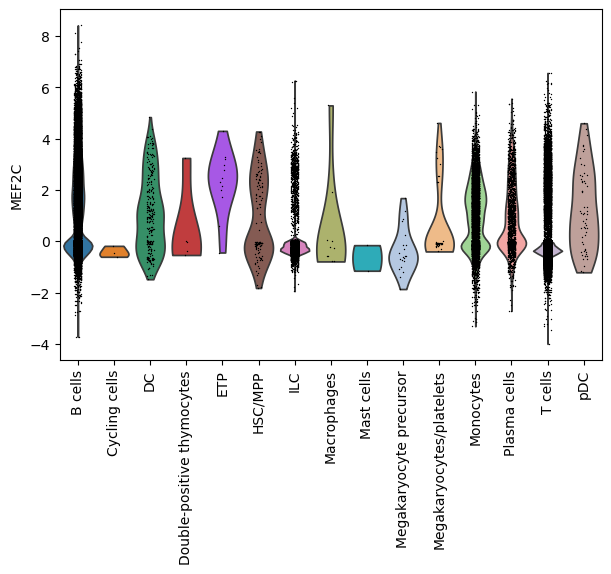

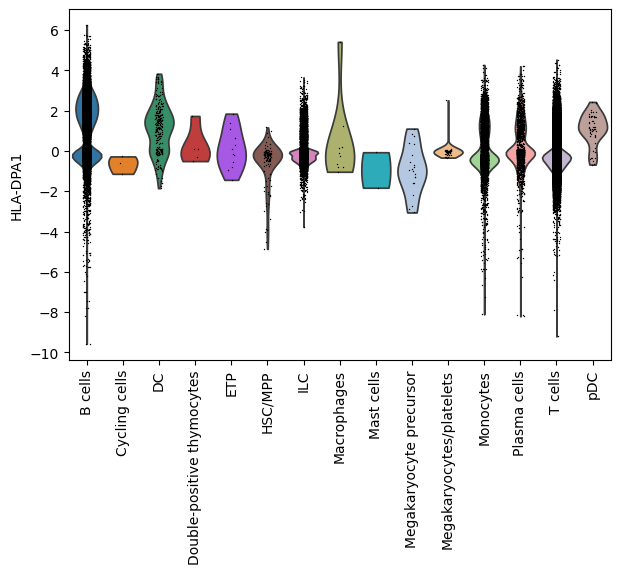

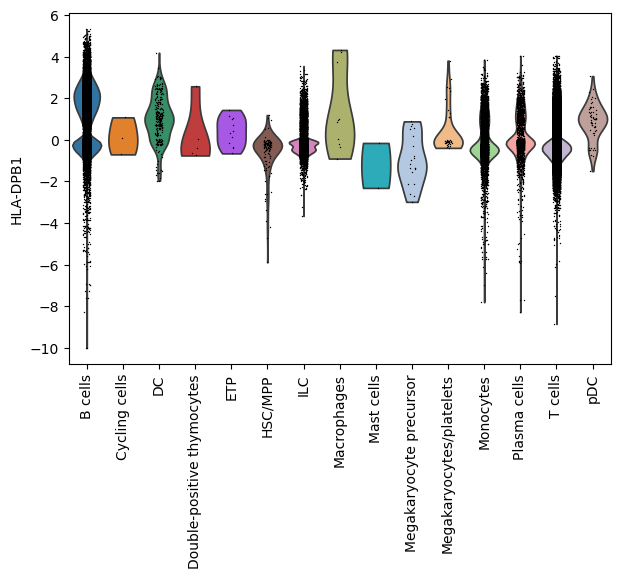

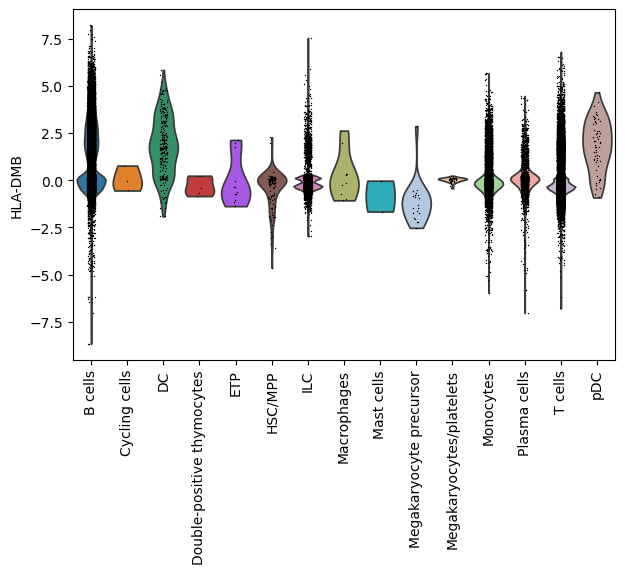

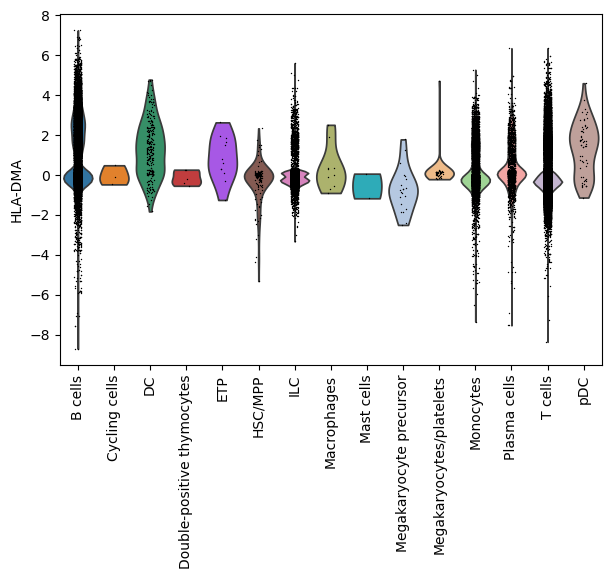

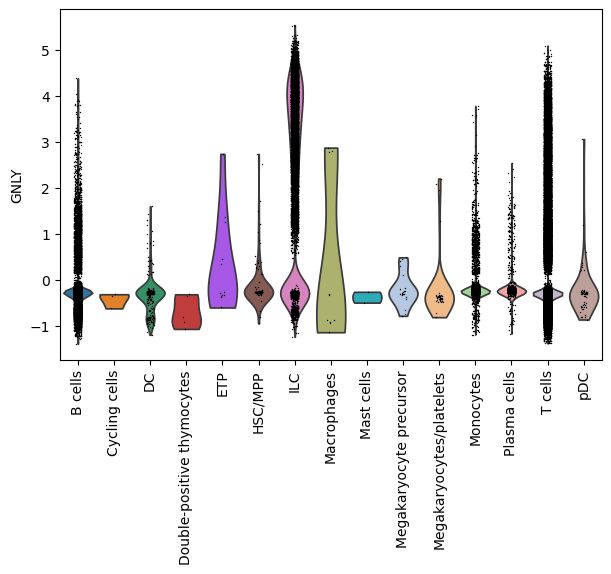

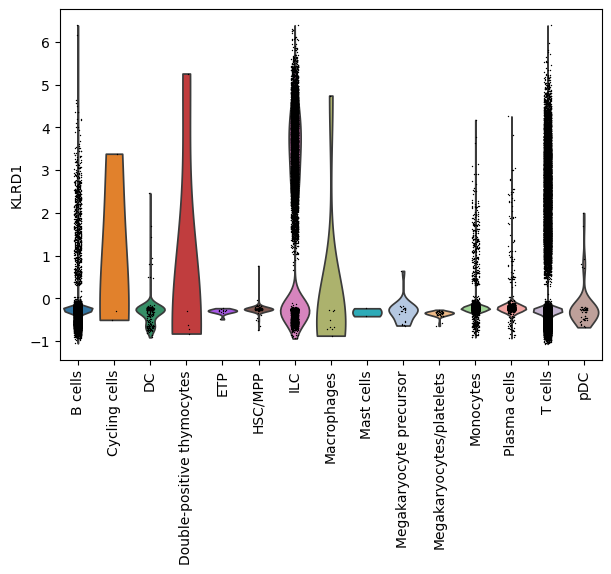

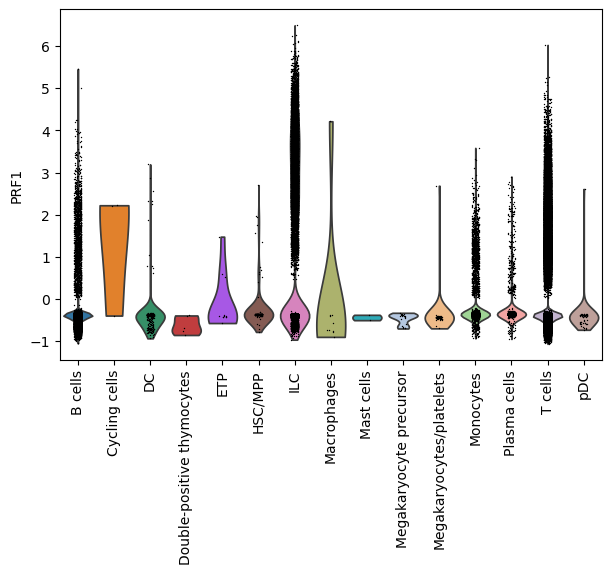

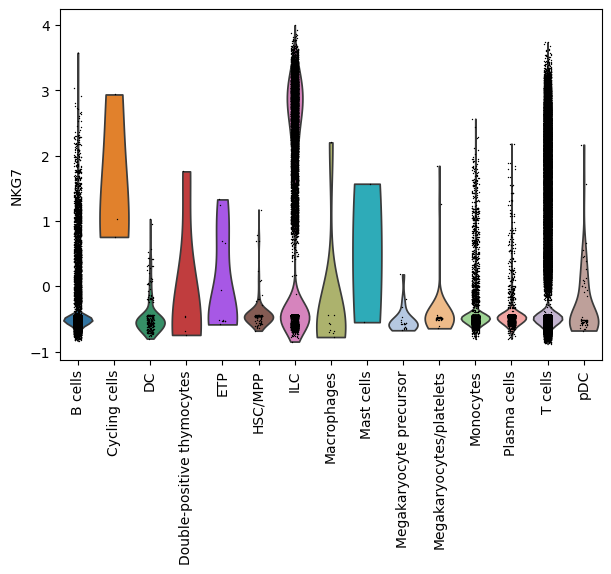

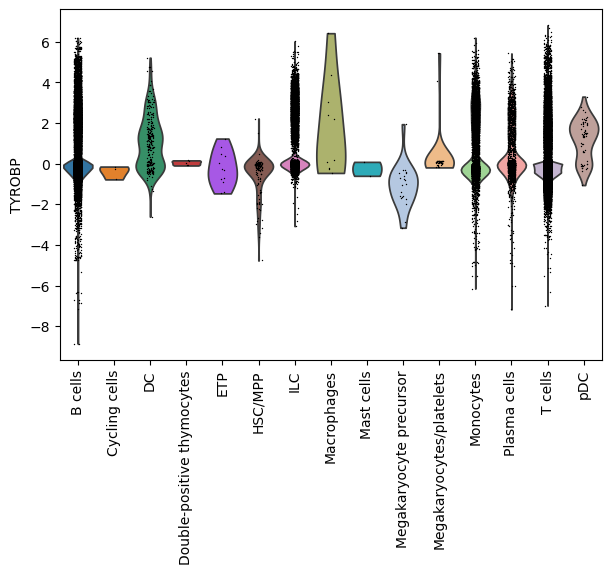

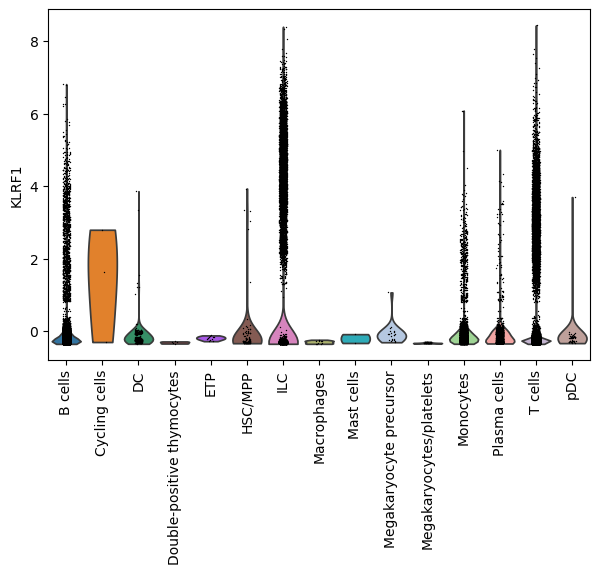

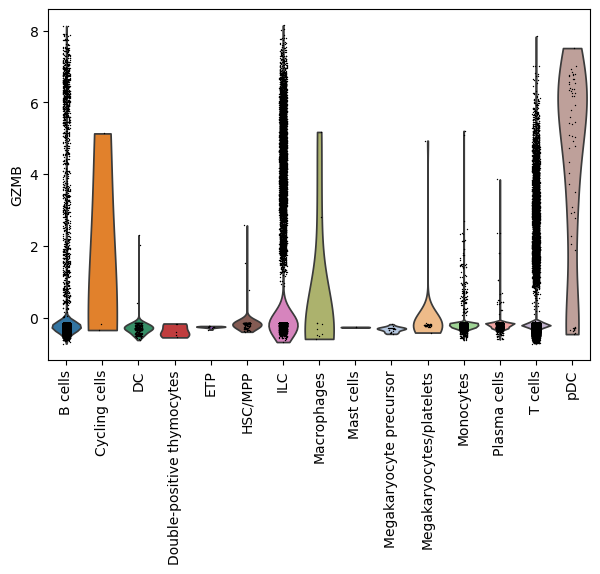

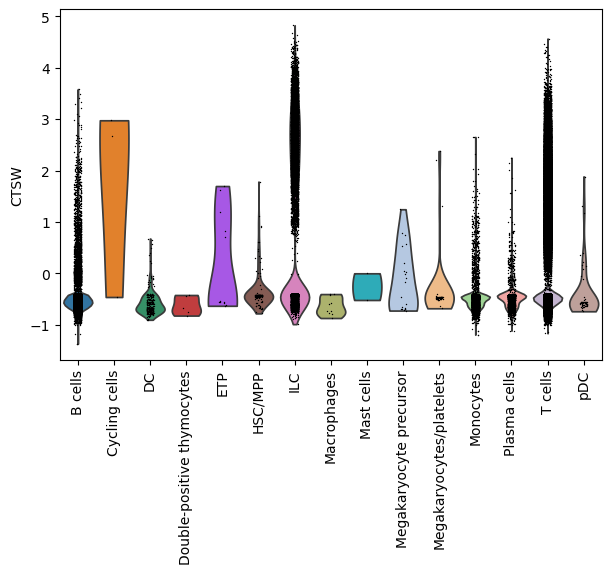

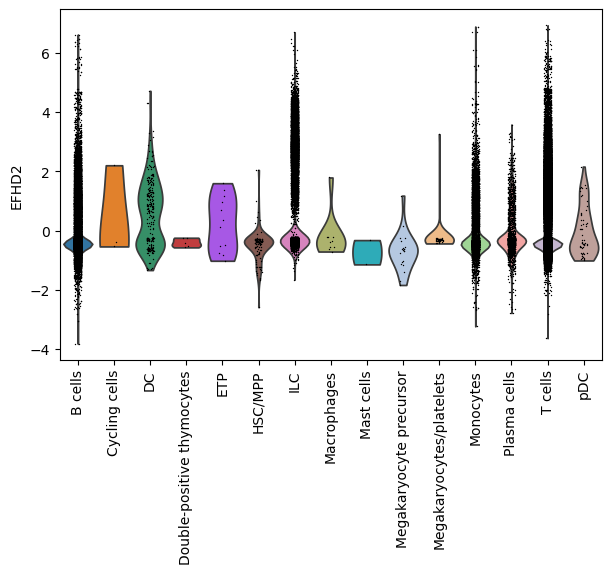

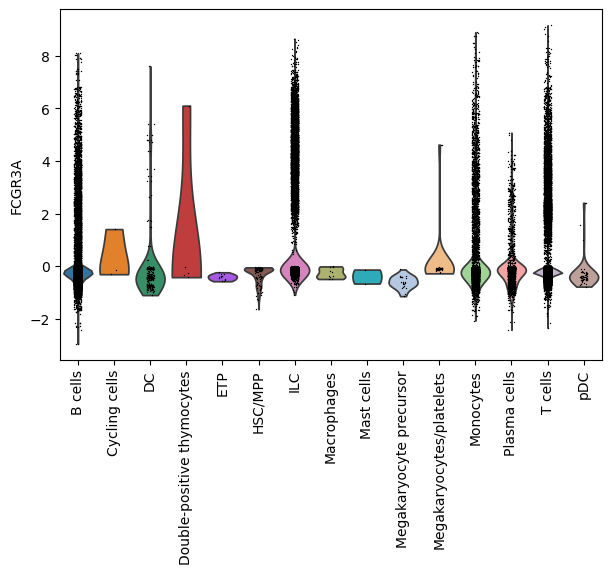

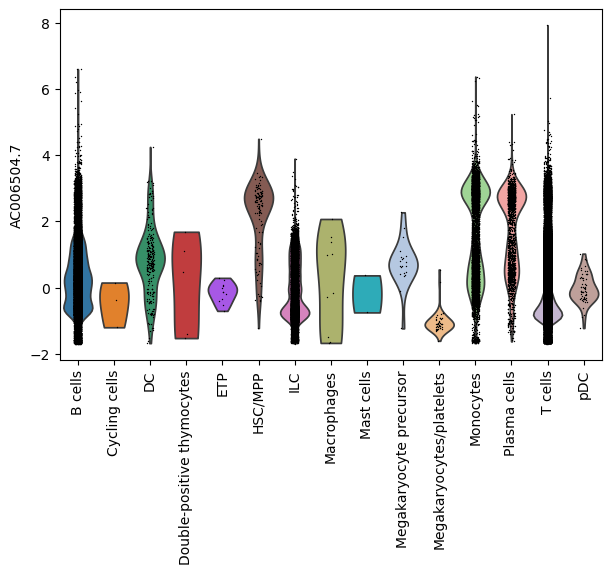

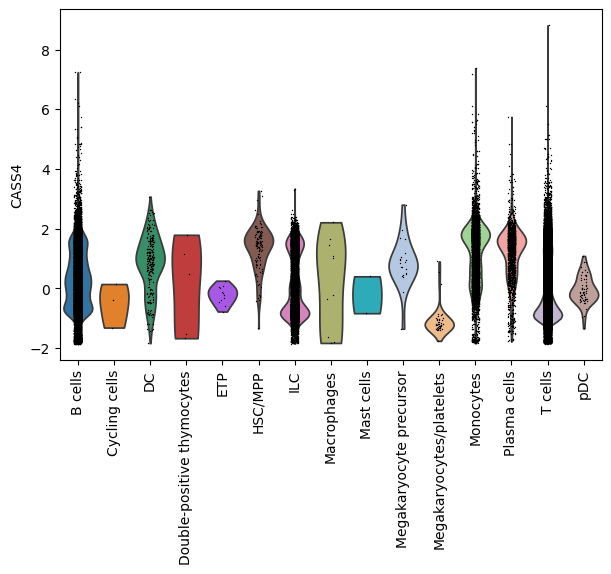

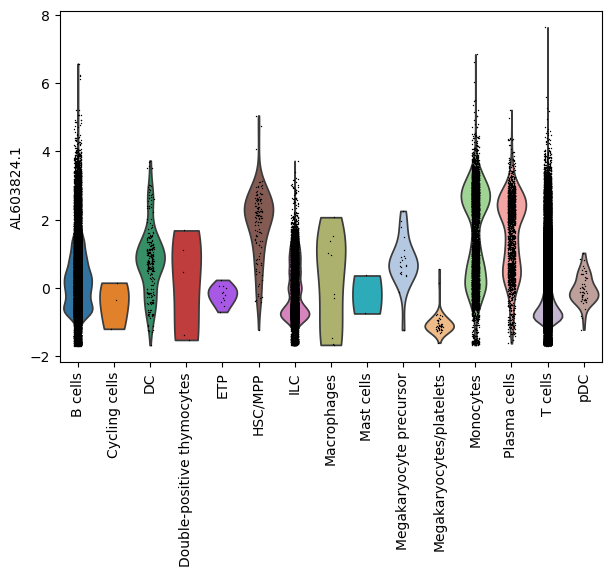

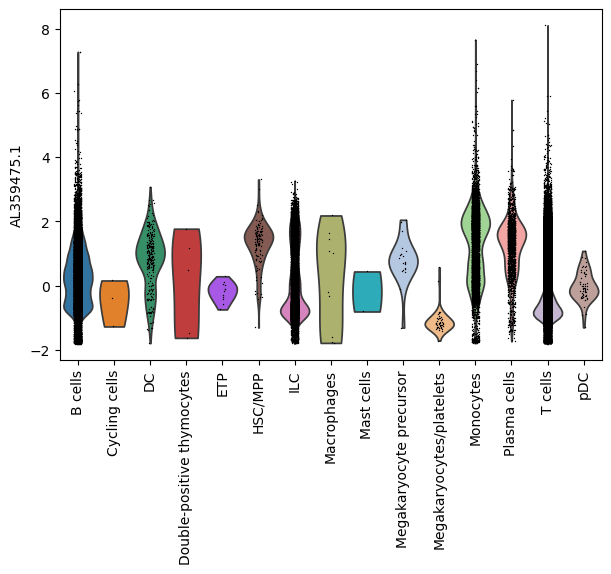

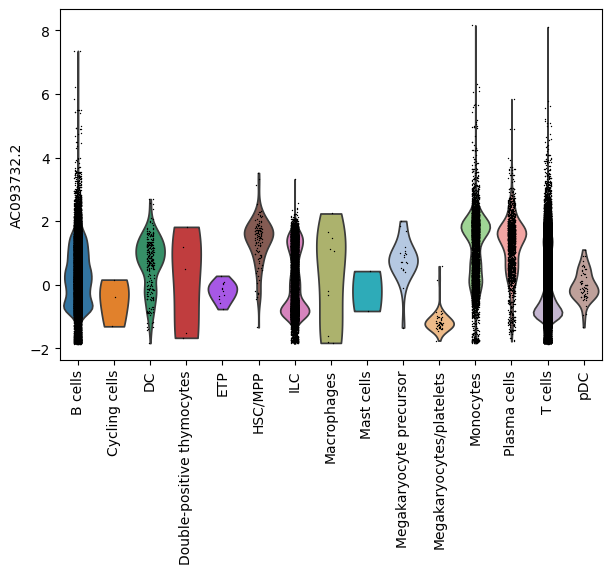

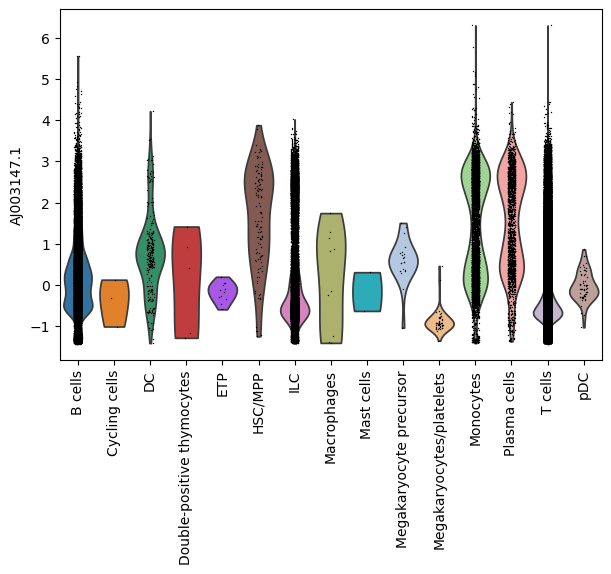

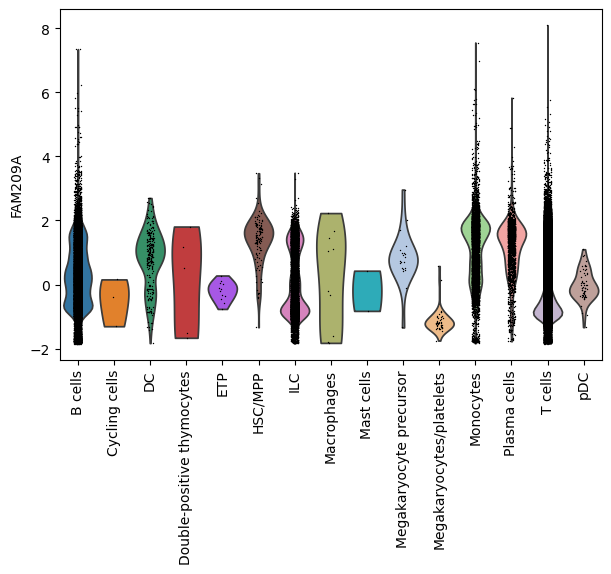

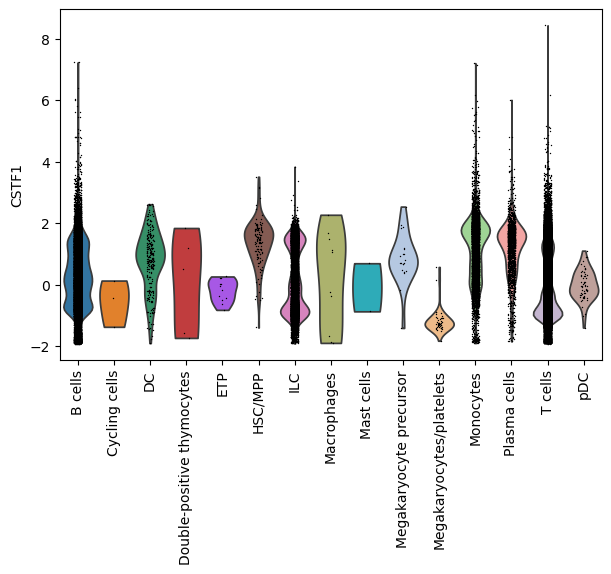

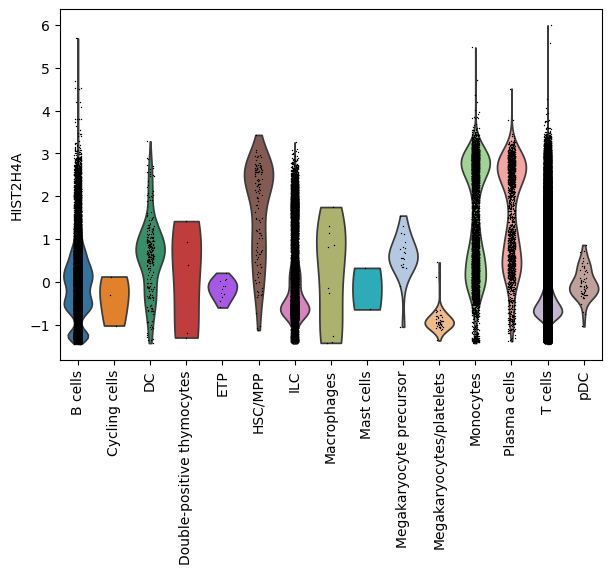

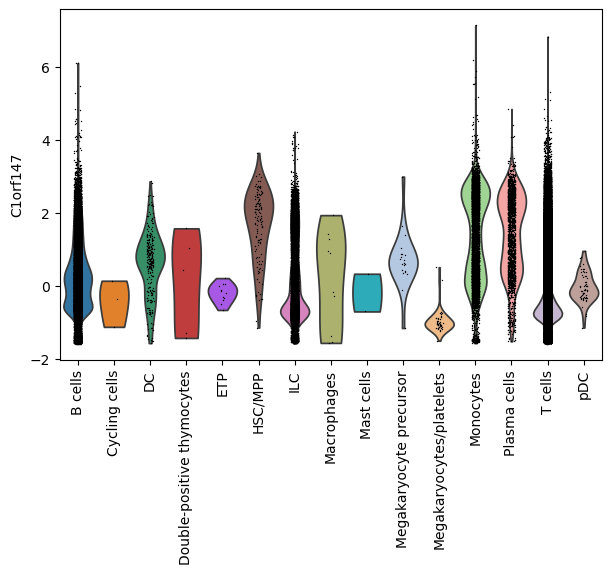

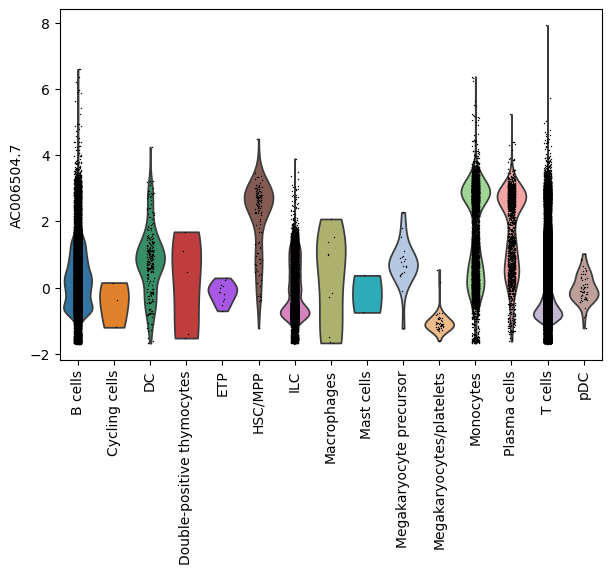

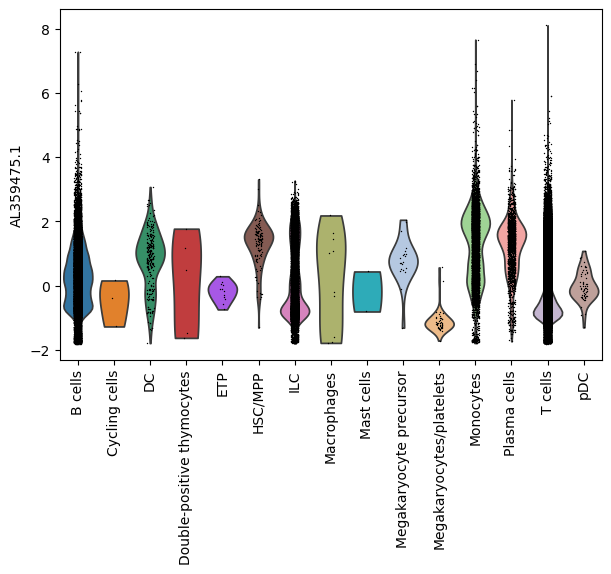

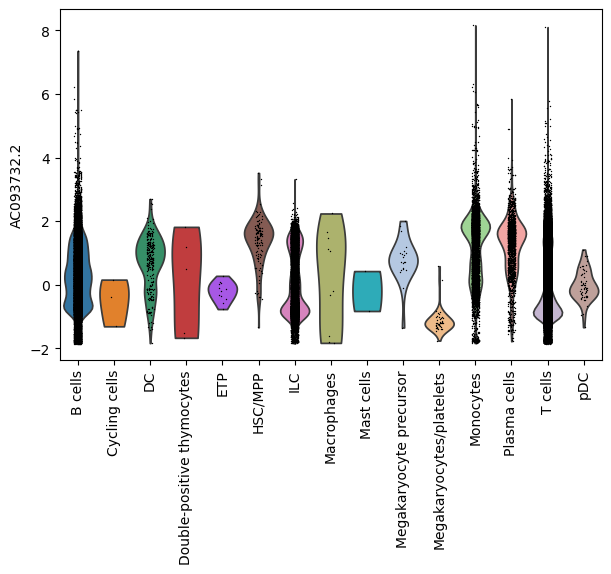

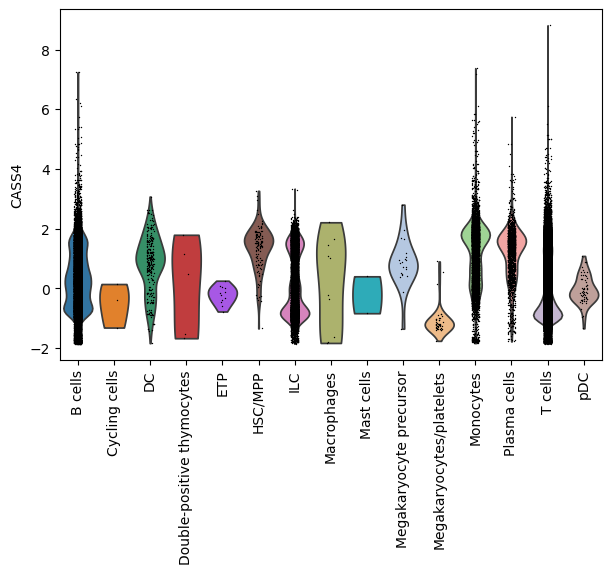

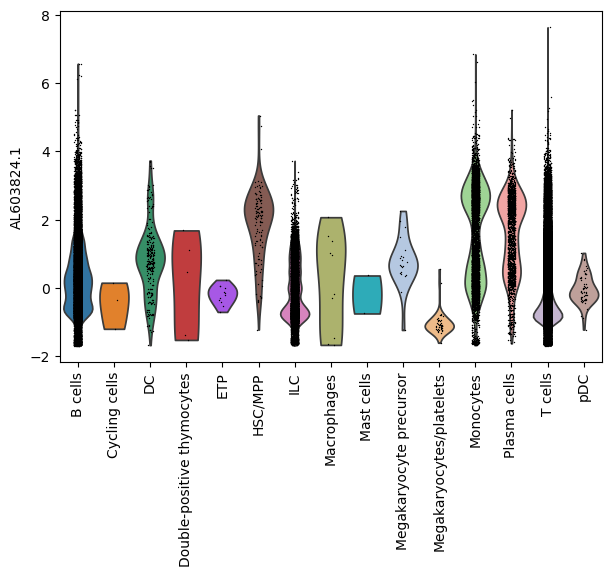

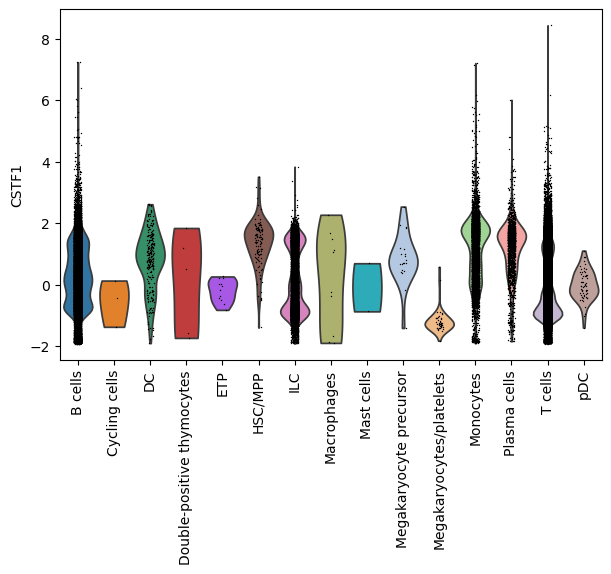

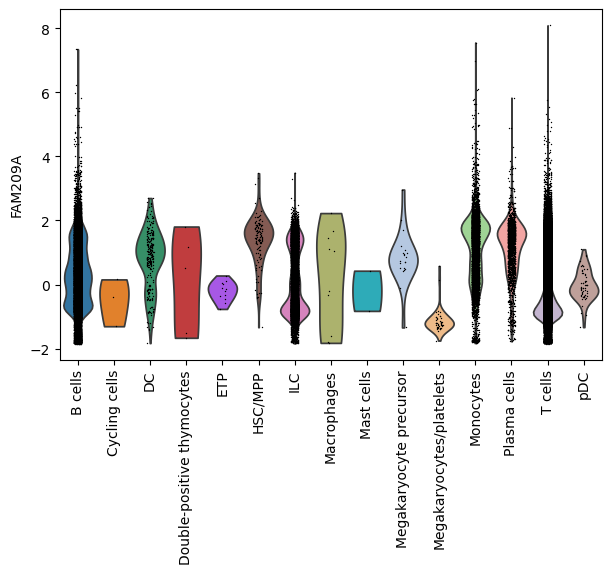

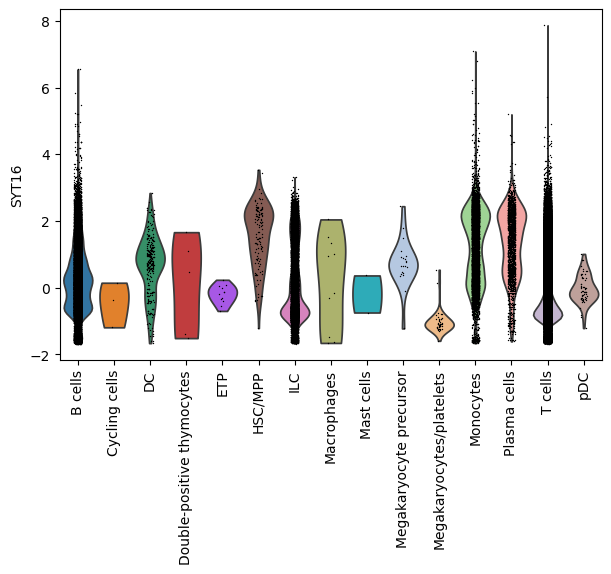

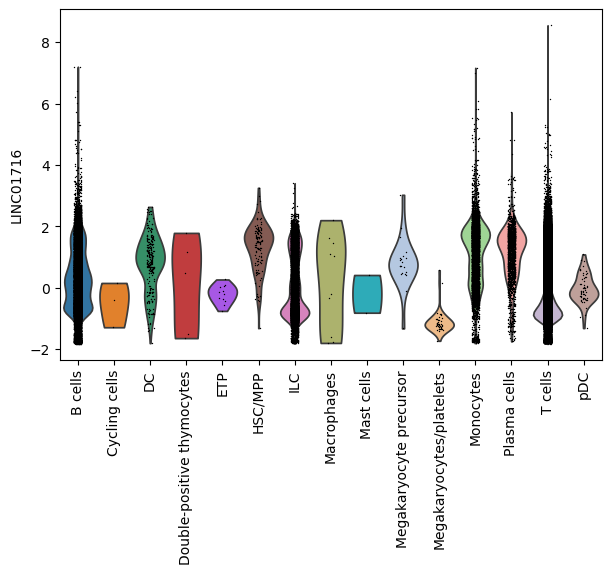

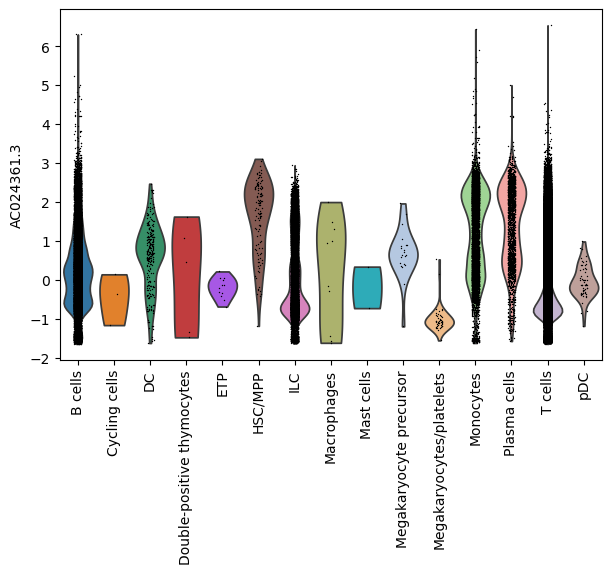

In [33]:
for gene in marker_genes:
    sc.pl.violin(adata, gene, groupby='cell_types_labels', rotation=90)

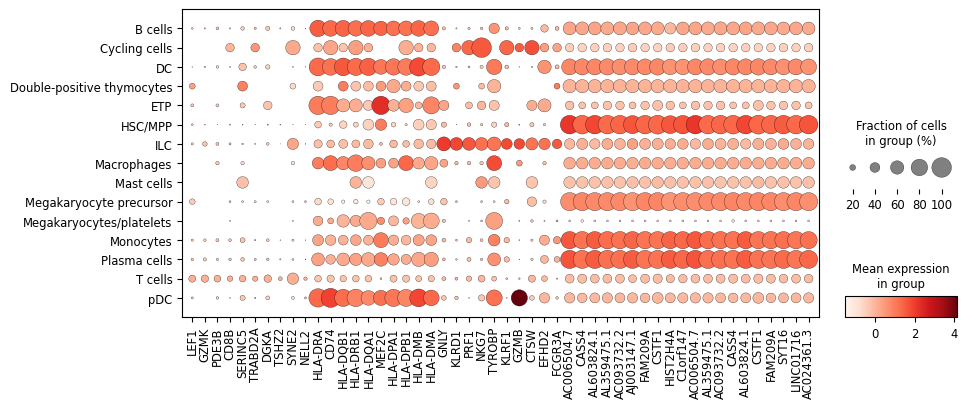

In [43]:
sc.pl.dotplot(adata, marker_genes, groupby='cell_types_labels', figsize=(10, 4), dendrogram=False);

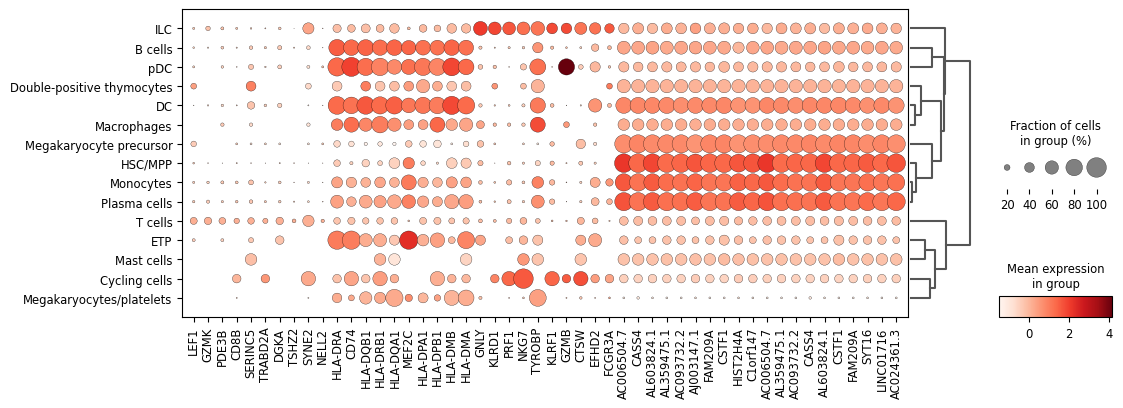

In [44]:
sc.pl.dotplot(adata, marker_genes, groupby='cell_types_labels', figsize=(12, 4), dendrogram=True);

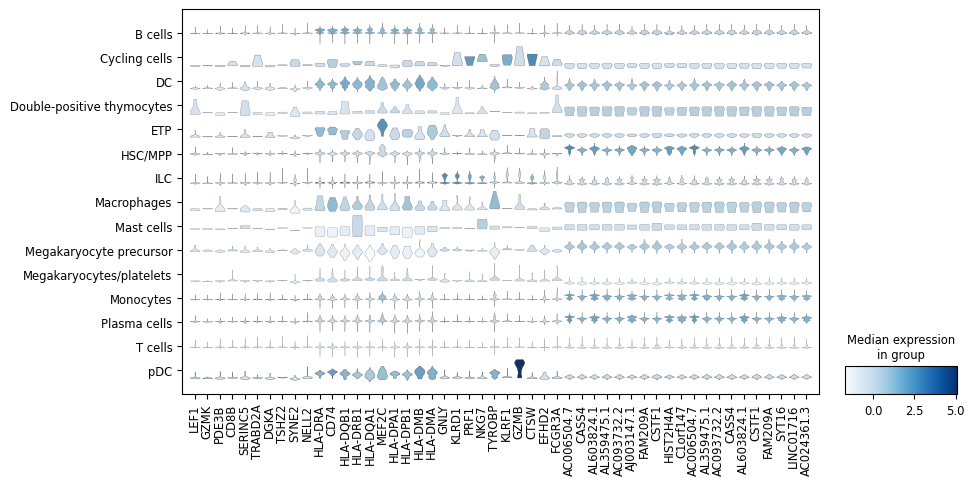

In [42]:
sc.pl.stacked_violin(adata, marker_genes, groupby='cell_types_labels', figsize=(10, 5), dendrogram=False);

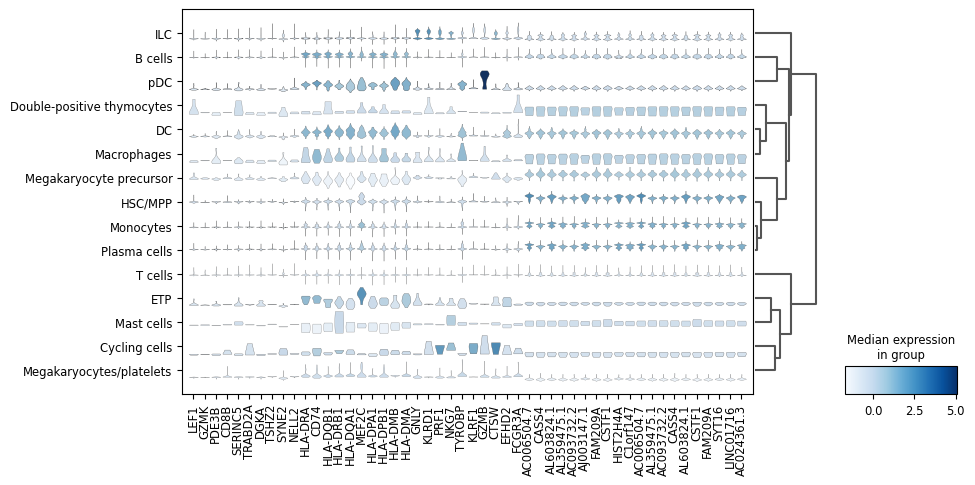

In [41]:
sc.pl.stacked_violin(adata, marker_genes, groupby='cell_types_labels', figsize=(10, 5), dendrogram=True);

In [53]:
adata_rest = adata[~adata.obs['cell_types_labels'].isin(most_freq_cell_types)]

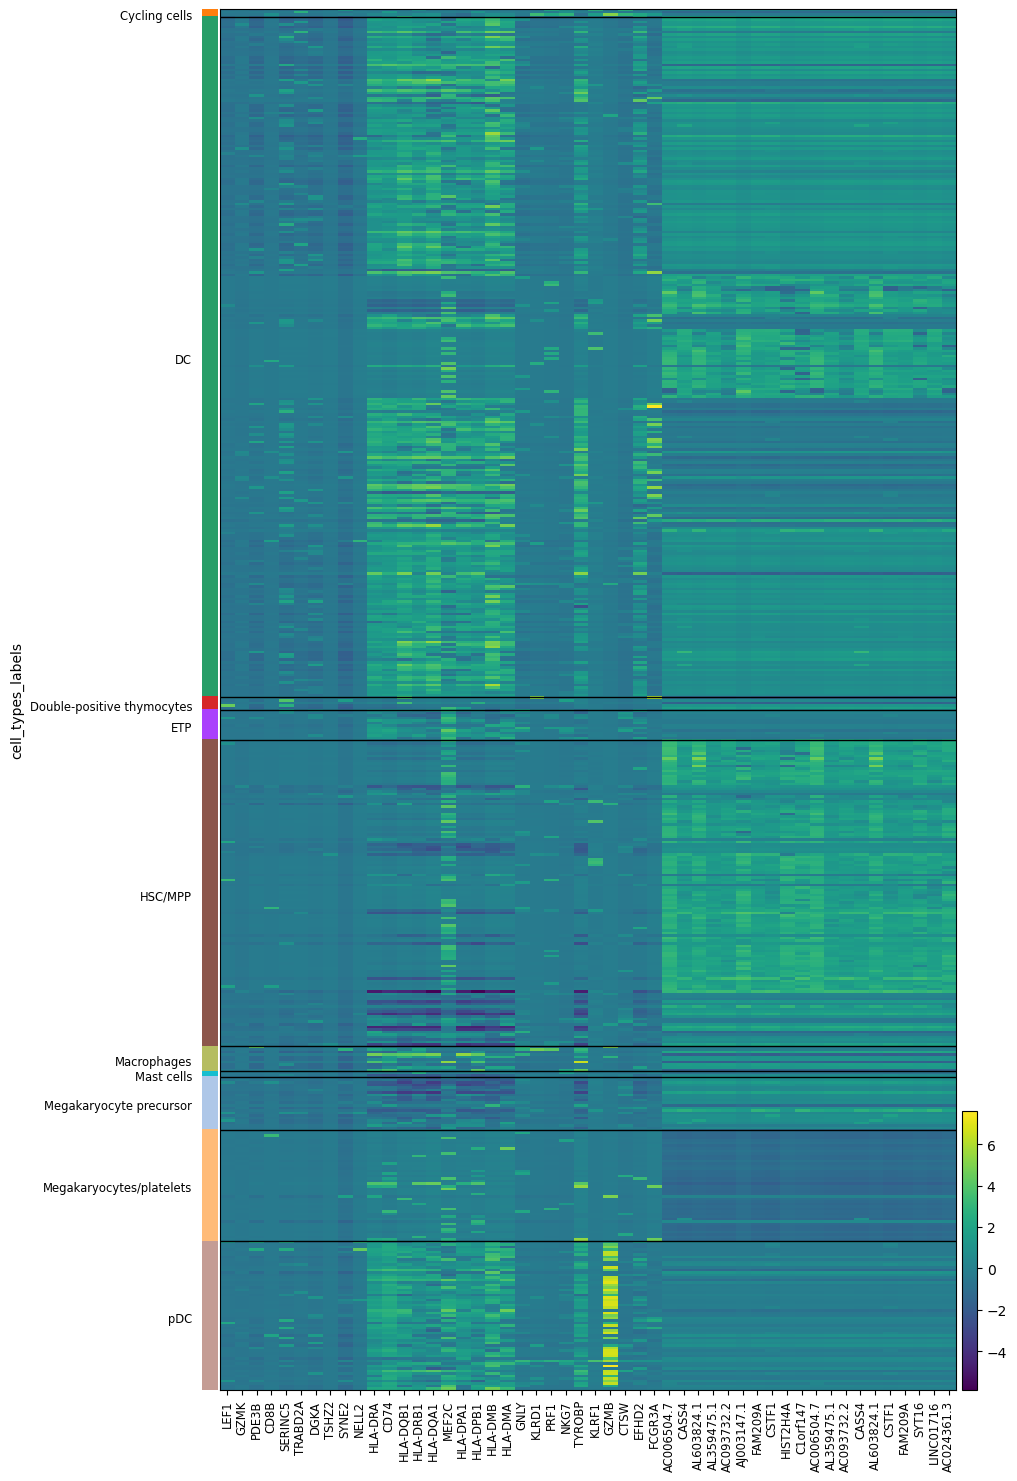

In [62]:
sc.pl.heatmap(adata_rest, marker_genes, groupby='cell_types_labels', dendrogram=False, figsize=(10, 18));

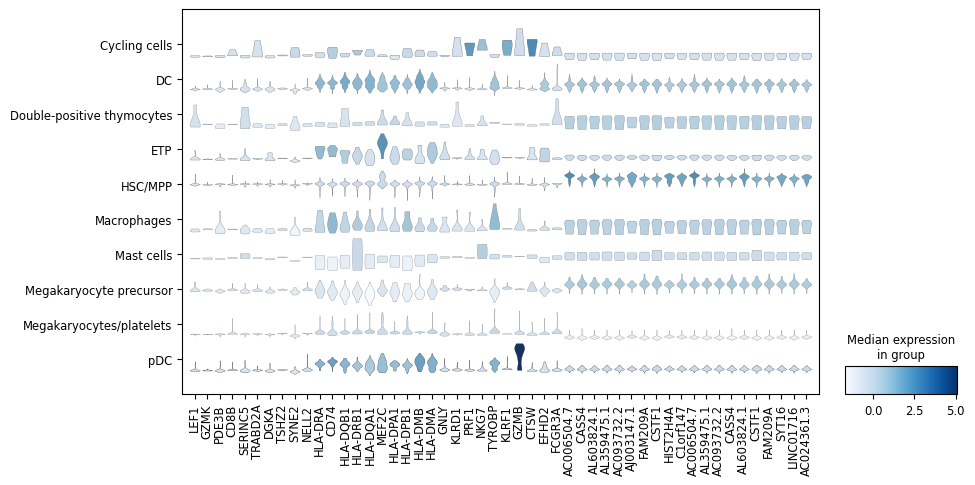

In [64]:
sc.pl.stacked_violin(adata_rest, marker_genes, groupby='cell_types_labels', figsize=(10, 5));

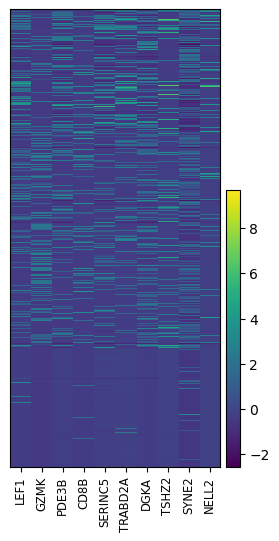

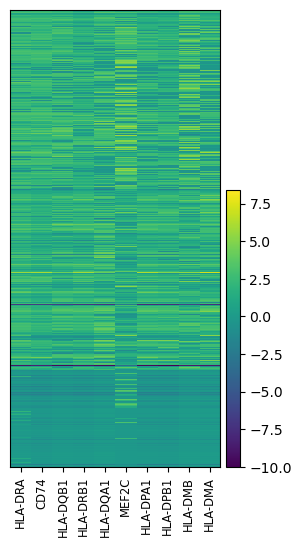

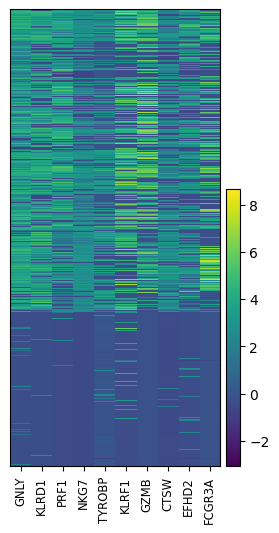

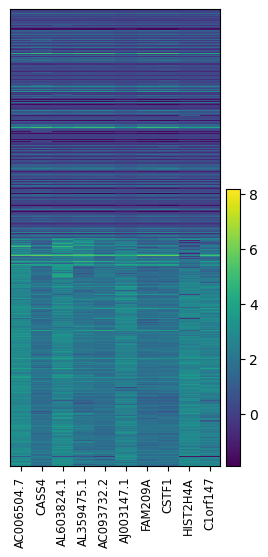

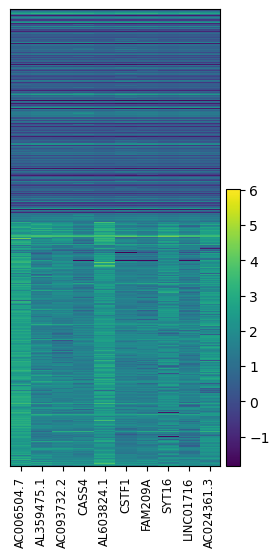

In [68]:
for cell_type in most_freq_cell_types:
    sc.pl.heatmap(adata[adata.obs['cell_types_labels'] == cell_type],
        cluster_genes[cell_type], groupby='cell_types_labels', dendrogram=False);